哈摟，各位資料科學家大家好，我是來自於台北市"頭期款不足"的阿宏，我想買房子很久了，但是不知道要買哪個地方，想先從內政部不動產交易時價登入資料中先了解行情，我現在手邊蒐集了台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)共四份資料，請各位資料科學家幫幫忙分析了。

# 1.不動產資料檔案讀取並串接

資料分散在4個資料，先合併成一個資料方便後續分析，但是我發現有英文欄位跟中文欄位，留下中文刪除英文，並加入新的欄位用以分辨台北市Taipei、新北市New_Taipei、台中市Taichung、高雄市Kaohsiung

1. 利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
2. 刪除csv中第二列英文翻譯，The villages and towns urban district,transaction sign,land sector position building sector house number plate,land shifting total area square meter,....
3. 生成city欄位其中以地區分類台北市Taipei(A_lvr_land_A.csv)、新北市New_Taipei(F_lvr_land_A.csv)、台中市Taichung(B_lvr_land_A.csv)、高雄市Kaohsiung(E_lvr_land_A.csv)
4. 將以上四份資料運用pd.concat()串接

In [1]:
import pandas as pd 
import os 
import numpy as np

In [2]:
#1.利用Pandas中的pd.read_csv()分別讀取A_lvr_land_A.csv、B_lvr_land_A.csv、E_lvr_land_A.csv、F_lvr_land_A.csv
df=pd.DataFrame()
for data in os.listdir("./data"):
    data=pd.read_csv(f"./data/{data}",skiprows=[1])
    data["City"]=data["土地區段位置建物區段門牌"][0][:3]
    df=pd.concat([df,data],ignore_index=True)
df

,鄉鎮市區,交易標的,土地區段位置建物區段門牌,土地移轉總面積平方公尺,都市土地使用分區,非都市土地使用分區,非都市土地使用編定,交易年月日,交易筆棟數,移轉層次,...,車位類別,車位移轉總面積(平方公尺),車位總價元,備註,編號,主建物面積,附屬建物面積,陽台面積,電梯,City
0,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.70,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,臺北市
1,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.00,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,臺北市
2,文山區,房地(土地+建物),臺北市文山區木柵路四段121~150號,39.64,其他,NaN,NaN,1090418,土地2建物1車位0,六層,...,NaN,0.00,0,NaN,RPSPMLMKNHPFFAA97CA,78.80,4.15,8.76,NaN,臺北市
3,中正區,房地(土地+建物),臺北市中正區和平西路一段31~60號,4.26,商,NaN,NaN,1090413,土地2建物1車位0,九層,...,NaN,0.00,0,含增建或未登記建物。;,RPPOMLMKNHPFFAA57CA,18.34,0.00,6.45,NaN,臺北市
4,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.00,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,臺北市
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59471,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080817,土地2建物1車位1,十三層,...,坡道平面,30.31,1100000,預售屋、或土地及建物分次登記案件;,RPXNMLOJRHPFFIF57DA,73.39,2.65,8.52,有,新北市
59472,三峽區,土地,成福段成福小段331~360地號,762.00,NaN,山坡地保育區,農牧用地,1090814,土地2建物0車位0,NaN,...,NaN,0.00,0,親友、員工、共有人或其他特殊關係間之交易;,RPQNMLRLQHPFFIF27DA,0.00,0.00,0.00,無,新北市
59473,鶯歌區,房地(土地+建物)+車位,國中街91~120號,28.21,其他,NaN,NaN,1080831,土地2建物1車位1,四層,...,坡道平面,30.31,1400000,預售屋、或土地及建物分次登記案件;,RPSPMLLLQHPFFIF07DA,73.40,2.64,8.52,有,新北市
59474,鶯歌區,房地(土地+建物)+車位,中山路301~330號,19.85,其他,NaN,NaN,1090809,土地1建物1車位1,七層,...,坡道平面,24.14,0,NaN,RPUOMLRKQHPFFIF67DA,51.72,0.00,5.40,有,新北市


# 2. 資料清理與切片

因為我是想買來住的房子，所以幫忙刪除住宿用途以外的資料，並且限制
1. 交易年月日，限制在109年
2. 建物現況格局-房，1~5間 
3. 建物現況格局-廳，1~2廳

以下columns_mapping、analysis_columns、columns_type提供給資料科學家配合使用
1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值
   (提示:先取完之後再.dropna())
3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
4. 做資料切片將<br>
    新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份<br>
    1.交易年月日(tx_dt_year)，限制在109年<br>
    2.建物現況格局-房(room_number)，限制在1到5間<br>
    3.建物現況格局-廳(hall_number)，限制在1到2廳<br>
    4.最後運用.reset_index()重新定義索引

In [3]:
columns_mapping = {'鄉鎮市區':'towns',
'交易標的':'transaction_sign',
'土地區段位置建物區段門牌':'house_number',
'土地移轉總面積平方公尺':'land_area_square_meter', 
'都市土地使用分區':'use_zoning', 
'非都市土地使用分區':'land_use_district',
'非都市土地使用編定':'land_use',
'交易年月日':'tx_dt', 
 '交易筆棟數':'transaction_pen_number', 
 '移轉層次':'shifting_level', 
 '總樓層數':'total_floor_number', 
 '建物型態':'building_state', 
 '主要用途':'main_use', 
 '主要建材':'main_materials',
 '建築完成年月':'complete_date', 
 '建物移轉總面積平方公尺':'building_area_square_meter', 
 '建物現況格局-房':'room_number', 
 '建物現況格局-廳':'hall_number', 
 '建物現況格局-衛':'health_number', 
'建物現況格局-隔間':'compartmented_number', 
 '有無管理組織':'manages', 
 '總價元':'total_price', 
 '單價元平方公尺':'unit_price', 
 '車位類別':'berth_category', 
 '車位移轉總面積(平方公尺)':'berth_area_square_meter',
'車位總價元':'berth_price', 
 '備註':'note', 
 '編號':'serial_number', 
 '主建物面積':'main_building_area', 
 '附屬建物面積':'auxiliary_building_area', 
 '陽台面積':'balcony_area', 
 '電梯':'elevator'
                  }
analysis_columns = ['City','towns','main_use','use_zoning','total_price','building_area_square_meter',
                                     'main_building_area',
                                     'tx_dt','unit_price','room_number','hall_number','health_number']
columns_type = {'total_price': 'int','unit_price':'float','building_area_square_meter':'float',
                                      'main_building_area': 'float',
                                      'room_number': 'int','hall_number': 'int','health_number': 'int'}

In [4]:
#1. 利用.rename()並配合以下columns_mapping，將原中文欄位名稱改為英文方便之後分析
df.rename(columns_mapping,axis=1,inplace=True)
df.columns

Index(['towns', 'transaction_sign', 'house_number', 'land_area_square_meter',
       'use_zoning', 'land_use_district', 'land_use', 'tx_dt',
       'transaction_pen_number', 'shifting_level', 'total_floor_number',
       'building_state', 'main_use', 'main_materials', 'complete_date',
       'building_area_square_meter', 'room_number', 'hall_number',
       'health_number', 'compartmented_number', 'manages', 'total_price',
       'unit_price', 'berth_category', 'berth_area_square_meter',
       'berth_price', 'note', 'serial_number', 'main_building_area',
       'auxiliary_building_area', 'balcony_area', 'elevator', 'City'],
      dtype='object')

In [5]:
#2. 取出主要用途(main_use)為'住家用'以及都市土地使用分區(use_zoning)為'住'的資料並針對以下欄位analysis_columns做分析並去除na值 (提示:先取完之後再.dropna())
#   (提示:先取完之後再.dropna())
df=df[(df["main_use"]=="住家用")&(df["use_zoning"]=="住")]
df.dropna(subset=analysis_columns,inplace=True)
df.drop_duplicates(subset=analysis_columns,keep="first",ignore_index=True,inplace=True)
df.head(3)

C:\Users\rober\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,towns,transaction_sign,house_number,land_area_square_meter,use_zoning,land_use_district,land_use,tx_dt,transaction_pen_number,shifting_level,...,berth_category,berth_area_square_meter,berth_price,note,serial_number,main_building_area,auxiliary_building_area,balcony_area,elevator,City
0,文山區,房地(土地+建物)+車位,臺北市文山區忠順街二段85巷1~30號,26.97,住,NaN,NaN,1090406,土地1建物1車位2,四層,...,坡道平面,40.7,0,含增建或未登記建物。;內含獨立產權車位，未包含在棟數內。,RPVOMLMKNHPFFAA18CA,110.91,9.63,11.09,NaN,臺北市
1,文山區,房地(土地+建物),臺北市文山區福興路91~120號,10.32,住,NaN,NaN,1090317,土地1建物1車位0,三層,...,NaN,0.0,0,含增建或未登記建物。;,RPPPMLMKNHPFFAA67CA,24.58,1.28,2.30,NaN,臺北市
2,文山區,房地(土地+建物),臺北市文山區樟新街56巷1~30號,44.57,住,NaN,NaN,1090328,土地3建物1車位0,四層,...,NaN,0.0,0,含增建或未登記建物。;,RPWNMLNKNHPFFAA28CA,98.74,2.26,11.84,NaN,臺北市


In [6]:
#3. 觀察欄位資料型態，並利用.astype()搭配以下提供的columns_type做欄位型態轉換
df.astype(columns_type)
df.dtypes

towns                          object
transaction_sign               object
house_number                   object
land_area_square_meter        float64
use_zoning                     object
land_use_district              object
land_use                       object
tx_dt                           int64
transaction_pen_number         object
shifting_level                 object
total_floor_number             object
building_state                 object
main_use                       object
main_materials                 object
complete_date                  object
building_area_square_meter    float64
room_number                     int64
hall_number                     int64
health_number                   int64
compartmented_number           object
manages                        object
total_price                     int64
unit_price                    float64
berth_category                 object
berth_area_square_meter       float64
berth_price                     int64
note        

In [7]:
#4. 做資料切片將
#     新增欄位交易年月日(tx_dt_year)，從交易年月日(tx_dt)萃取出年份
#     1.交易年月日(tx_dt_year)，限制在109年
#     2.建物現況格局-房(room_number)，限制在1到5間
#     3.建物現況格局-廳(hall_number)，限制在1到2廳
#     4.最後運用.reset_index()重新定義索引
df["tx_dt_year"]=df["tx_dt"]//10000
df=df[df["tx_dt_year"]==109]
cond1=(df["room_number"]<=5)&(df["room_number"]>=1)
cond2=(df["hall_number"]<=2)&(df["hall_number"]>=1)
new_df=df[cond1&(cond2)]
new_df.reset_index(drop=True,inplace=True)
new_df["room_number"].unique()

C:\Users\rober\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


array([3, 2, 5, 4, 1], dtype=int64)

# 3. 建立自定義特徵加入分析


以台灣來說大家都是以坪為單位計算使用面積，應該是不會問說你家有幾平方公尺吧?，但是偏偏資料中沒有以坪為單位計算，所以接下來請各位幫忙產生新的欄位以坪為單位計算面積，轉換公式我也幫你找好了，在下面的定義。<br>
定義 : 1平方公尺相當於0.3025坪 <br>
建立新特徵
1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺\*0.3025
2. 主建物面積坪(main_building_area_square_feet) : 主建物面積\*0.3025
3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025

可以利用.describe()做一下資料觀察，是否有奇怪的資料?<br>
如果有請將資料移除，並說明為什麼移除此資料?<br>
移除後再用.describe()觀察是否還有奇怪的資料?

In [8]:
# 建立新特徵
# 1. 建物移轉總面積坪(building_area_square_feet) : 建物移轉總面積平方公尺*0.3025
# 2. 主建物面積坪(main_building_area_square_feet) : 主建物面積*0.3025
# 3. 單價元坪(unit_price_square_feet) : 單價元平方公尺/0.3025
new_df["building_area_square_feet"]=new_df["building_area_square_meter"]*0.3025
new_df["main_building_area_square_feet"]=new_df["main_building_area"]*0.3025
new_df["unit_price_square_feet"]=new_df["unit_price"]/0.3025

In [9]:
# 可以利用.describe()做一下資料觀察，是否有奇怪的資料?
# 如果有請將資料移除，並說明為什麼移除此資料?


outlier=new_df[(new_df["unit_price_square_feet"]==0)|(new_df["main_building_area"]==0)]
#outlier
new_df.drop(outlier.index,axis=0,inplace=True)

C:\Users\rober\anaconda3\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [10]:
# 移除後再用.describe()觀察是否還有奇怪的資料?
new_df.reset_index(drop=True)
new_df.describe()


,land_area_square_meter,tx_dt,building_area_square_meter,room_number,hall_number,health_number,total_price,unit_price,berth_area_square_meter,berth_price,main_building_area,auxiliary_building_area,balcony_area,tx_dt_year,building_area_square_feet,main_building_area_square_feet,unit_price_square_feet
count,6842.000000,6.842000e+03,6842.000000,6842.000000,6842.000000,6842.000000,6.842000e+03,6842.000000,6842.000000,6.842000e+03,6842.000000,6842.000000,6842.000000,6842.0,6842.000000,6842.000000,6.842000e+03
mean,28.516513,1.090463e+06,121.765766,2.849752,1.793481,1.733557,1.141876e+07,94581.933937,6.947002,1.652709e+05,82.557496,4.911893,5.115681,109.0,36.834144,24.973643,3.126676e+05
std,26.708997,8.590961e+01,62.879509,0.899052,0.404837,0.681074,1.161654e+07,58380.072197,15.701466,7.159143e+05,36.966199,7.796642,6.072709,0.0,19.021051,11.182275,1.929920e+05
min,1.260000,1.090102e+06,7.440000,1.000000,1.000000,0.000000,4.100000e+05,3239.000000,0.000000,0.000000e+00,7.440000,0.000000,0.000000,109.0,2.250600,2.250600,1.070744e+04
25%,14.970000,1.090416e+06,83.012500,2.000000,2.000000,1.000000,5.600000e+06,53597.250000,0.000000,0.000000e+00,60.975000,0.000000,0.000000,109.0,25.111281,18.444937,1.771810e+05
50%,22.575000,1.090503e+06,109.390000,3.000000,2.000000,2.000000,8.600000e+06,79775.000000,0.000000,0.000000e+00,79.090000,1.185000,2.995000,109.0,33.090475,23.924725,2.637190e+05
75%,31.460000,1.090517e+06,147.445000,3.000000,2.000000,2.000000,1.330000e+07,118908.250000,0.000000,0.000000e+00,95.940000,8.360000,9.470000,109.0,44.602112,29.021850,3.930851e+05
max,588.550000,1.090802e+06,1444.950000,5.000000,2.000000,6.000000,2.250000e+08,610104.000000,208.380000,1.851000e+07,335.760000,154.100000,48.130000,109.0,437.097375,101.567400,2.016873e+06


# 4. 找出台北市時價登入總價高度相關的變數

阿宏我是台北人他想找出影響台北市總價、單價元坪的因子<br>
相關係數0.3以下為低相關，0.3\~0.7為中等相關，0.7以上為高度相關<br>
1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數

In [11]:
# 阿宏我是台北人他想找出影響台北市總價、單價元坪的因子
# 1. 資料切片切出city欄位為台北市的資料，並找出時價登入總價(total_price)高度相關的變數
total_price_corr=new_df[new_df["City"]=="臺北市"].corr()["total_price"]
total_price_corr.dropna(inplace=True)
total_price_corr=total_price_corr.reset_index()
total_price_corr.columns=["variable","corr"]
total_price_corr["corr_rank"]=pd.cut(np.abs(total_price_corr["corr"]),[0,0.3,0.7,1],labels=["Low","Medium","High"],include_lowest=True)
print(total_price_corr[total_price_corr["corr_rank"]=="High"])
# 2. 資料切片切出city欄位為台北市的資料，找出單價元坪(unit_price_square_feet)高度相關的變數
unit_price_corr=new_df[new_df["City"]=="臺北市"].corr()["unit_price_square_feet"]
unit_price_corr.dropna(inplace=True)
unit_price_corr=unit_price_corr.reset_index()
unit_price_corr.columns=["variable","corr"]
unit_price_corr["corr_rank"]=pd.cut(np.abs(unit_price_corr["corr"]),[0,0.3,0.7,1],labels=["Low","Medium","High"],include_lowest=True)
print(unit_price_corr[unit_price_corr["corr_rank"]=="High"])

                          variable      corr corr_rank
2       building_area_square_meter  0.865154      High
6                      total_price  1.000000      High
10              main_building_area  0.711069      High
13       building_area_square_feet  0.865154      High
14  main_building_area_square_feet  0.711069      High
                  variable  corr corr_rank
7               unit_price   1.0      High
15  unit_price_square_feet   1.0      High


# 5. 資料視覺化並解釋


我想要以視覺化的方式來看房價資料，並且請各位資料科學家解釋圖表給阿宏我知道
1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區

C:\Users\rober\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


台北市單價坪(unit_price_square_feet)中位數最高


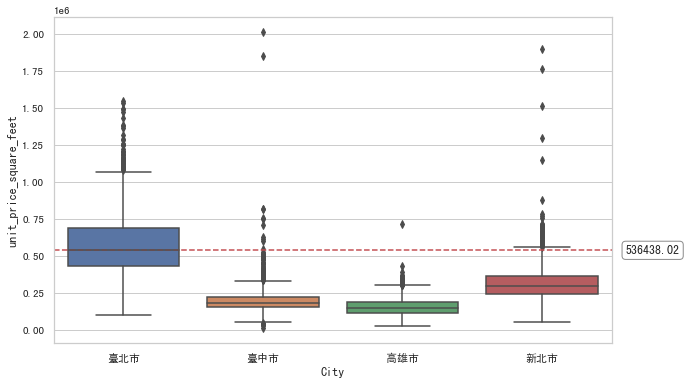

In [12]:
#1. 以城市(city)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['SimHei']})
sns.boxplot("City","unit_price_square_feet",data=new_df)
plt.axhline(y=new_df[new_df["City"]=="臺北市"]["unit_price_square_feet"].median(),ls="--",alpha=1,color="r")
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
plt.text(3.6,new_df[new_df["City"]=="臺北市"]["unit_price_square_feet"].median(),str(round(new_df[new_df["City"]=="臺北市"]["unit_price_square_feet"].median(),2)),
         bbox=bbox_props,ha="left",va="center")
print("台北市單價坪(unit_price_square_feet)中位數最高")

台北市四間房總價(total_price)中位數最高


C:\Users\rober\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


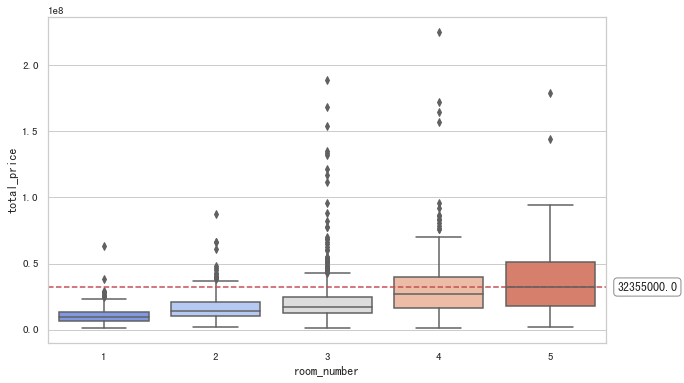

In [13]:
#2. 進一步對台北市的資料做圖，以建物現況格局-房(room_number)為x軸，以總價元(total_price)為y軸畫出boxplot，並找出總價元(total_price)中位數最高的房間數。hint:資料切片找出city欄位為台北市的資料，再進一步畫圖
new_df_taipei=new_df.copy()
new_df_taipei=new_df[new_df["City"]=="臺北市"]
plt.figure(figsize=(10,6))
# sns.set(font=['sans-serif'])
# sns.set_style("whitegrid",{"font.sans-serif":['SimHei']})
sns.boxplot("room_number","total_price",data=new_df_taipei,palette="coolwarm")
plt.axhline(y=new_df_taipei.groupby("room_number")["total_price"].median().max(),ls="--",alpha=1,color="r")
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
plt.text(4.6,new_df_taipei.groupby("room_number")["total_price"].median().max(),str(round(new_df_taipei.groupby("room_number")["total_price"].median().max(),2)),
         bbox=bbox_props,ha="left",va="center")
print("台北市四間房總價(total_price)中位數最高")

C:\Users\rober\anaconda3\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)
C:\Users\rober\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


town_label_encoding
8     779585.123967
10    659947.107438
7     659692.561983
Name: unit_price_square_feet, dtype: float64
台北市大安區單價坪(unit_price_square_feet)中位數最高


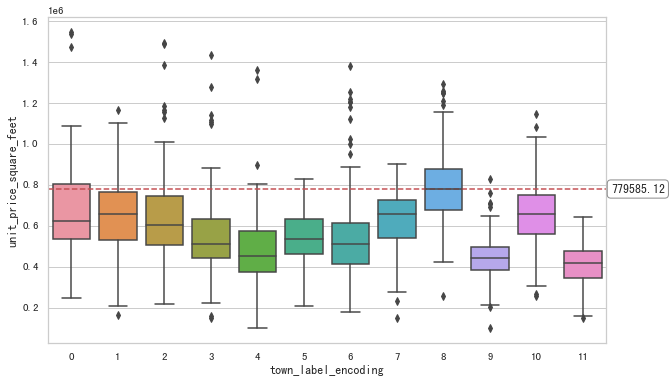

In [14]:
#3. 對台北市的資料做圖，先將地區(twons)做編碼在進行，再以地區(twon)為x軸，以單價元坪(unit_price_square_feet)為y軸畫出boxplot，並找出單價元坪(unit_price_square_feet)中位數最高的地區。
# hint:運用LabelEncoder()對地區(twons)做編碼，運用.inverse_transform()反查編碼的地區
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
new_df_taipei["town_label_encoding"]=le.fit_transform(new_df_taipei["towns"])
print(new_df_taipei.groupby("town_label_encoding")["unit_price_square_feet"].median().sort_values(ascending=False).head(3))
plt.figure(figsize=(10,6))
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['SimHei']})
sns.boxplot("town_label_encoding","unit_price_square_feet",data=new_df_taipei)
plt.axhline(y=new_df_taipei.groupby("town_label_encoding")["unit_price_square_feet"].median().max(),ls="--",alpha=1,color="r")
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
plt.text(11.6,new_df_taipei.groupby("town_label_encoding")["unit_price_square_feet"].median().max(),str(round(new_df_taipei.groupby("town_label_encoding")["unit_price_square_feet"].median().max(),2)),
         bbox=bbox_props,ha="left",va="center")
print(f"台北市{(le.inverse_transform([8]).tolist()[0])}單價坪(unit_price_square_feet)中位數最高")